## Mobile Price Analysis
Your friend has started his own mobile manufacturing company. He do not know how to estimate price of mobiles his company creates as guessing would not help ! To solve this problem he have collected sales data of mobile phones of various companies.

Your friend want to find out some relationship between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem, on the basis of the mobile Specification like Battery power, 3G enabled, wifi, Bluetooth, Ram etc you have to predict Price range of the mobile, not "actual price" in following range: 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

Applied Models:
Linear Regression
KNN
Logistic Regression
Decision tree
Random forest

In [1]:
# import necessary libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# fetch database
dataset=pd.read_csv('E:/abhi/Desktop/Intel-HPC/ml_algos/ML_casestudy/mobile-price-classification/train.csv')
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
dataset.info()

In [ ]:
dataset.info()

 ## Data Visualization & Analysis

In [ ]:
# Plot pairwise relationships in a dataset.

sns.pairplot(dataset,hue='price_range')
# Variable in 'dataset' to map plot aspects to different colors.

In [ ]:
## RAM Vs Price range

sns.jointplot(x='ram',y='price_range',data=dataset,color='red',kind='kde');

In [ ]:
## Internal Memory vs Price Range

sns.pointplot(y="int_memory", x="price_range", data=dataset)

In [ ]:
## Percentage of phone supporting 3G

labels = ["3G-supported",'Not supported']
values=dataset['three_g'].value_counts().values

fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

In [ ]:
## Percentage of phone supporting 4G

labels4g = ["4G-supported",'Not supported']
values4g = dataset['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values4g, labels=labels4g, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

In [ ]:
## Battery power Vs Price range

sns.boxplot(x="price_range", y="battery_power", data=dataset)

In [ ]:
## No of Phones vs Camera megapixels of front and primary camera

plt.figure(figsize=(10,6))
dataset['fc'].hist(alpha=0.5,color='blue',label='Front camera')
dataset['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

In [ ]:
## Mobile Weght vs Price range

sns.jointplot(x='mobile_wt',y='price_range',data=dataset,kind='kde');

In [ ]:
## Talk Time Vs Price range

sns.pointplot(y="talk_time", x="price_range", data=dataset)

In [3]:
## collect Data in X and y

X=dataset.drop('price_range',axis=1)
y=dataset['price_range']

 ##  Splitting Data

In [4]:
# train/test split function
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

## Modeling

In [5]:
# Creating & Training Linear Regression Model

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [6]:
# Calculate score
lm.score(X_test,y_test)

0.9132801488185275

In [7]:
# Creating & Training KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [8]:
# Calculate score
knn.score(X_test,y_test)

0.9212121212121213

In [9]:
#Elbow method for finding optimum K value

error_rate = []
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

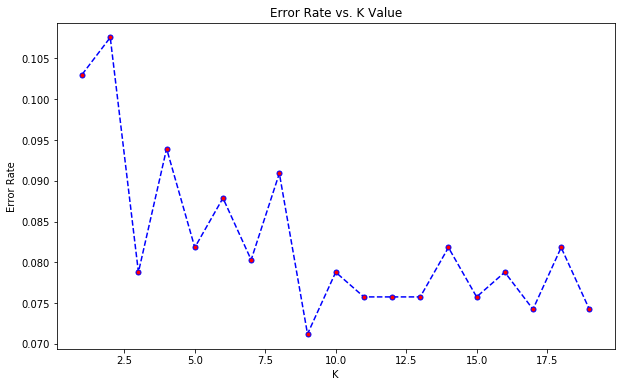

In [10]:
# Plot error rate Vs K value

plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [11]:
# Creating & Training Logistic Regression Model

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\abhi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\abhi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [12]:
# Calculate score
logmodel.score(X_test,y_test)

0.7515151515151515

In [ ]:
# Creating & Training Decision Tree Model

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

In [ ]:
# Calculate score
dtree.score(X_test,y_test)

## Creating & Training Random Tree Model

In [ ]:
# Creating & Training Random Tree Model

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)


In [ ]:
# calculate score
rfc.score(X_test,y_test)

In [ ]:
# Best performing ML Algo: 
#                                KNN & Linear Regression 

In [ ]:
# Result derived from Linear Regression

y_pred=lm.predict(X_test)
plt.scatter(y_test,y_pred)

In [ ]:
# Result
plt.plot(y_test,y_pred)

## Result derived from KNN

In [13]:
# Result derived from KNN

from sklearn.metrics import classification_report,confusion_matrix
pred = knn.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       158
           1       0.88      0.95      0.91       152
           2       0.93      0.85      0.89       199
           3       0.92      0.93      0.93       151

   micro avg       0.93      0.93      0.93       660
   macro avg       0.93      0.93      0.93       660
weighted avg       0.93      0.93      0.93       660



In [ ]:
# Confusion Matrix
matrix=confusion_matrix(y_test,pred)
print(matrix)

In [ ]:
# display confusion matrix data as heat map
plt.figure(figsize = (10,7))
sns.heatmap(matrix,annot=True)

## Price prediction

In [ ]:
# Price prediction of Test.csv Using KNN for Prediction

data_test=pd.read_csv('E:/abhi/Desktop/Intel-HPC/ml_algos/ML_casestudy/mobile-price-classification/test.csv')
data_test.head()

In [ ]:
# remove "ID" feature from test data

data_test=data_test.drop('id',axis=1)
data_test.head()

In [ ]:
# Applying KNN on Test data to predict price range

predicted_price=knn.predict(data_test)
predicted_price

In [ ]:
#Adding Predicted price to test.csv

data_test['price_range']=predicted_price